In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CostReport_2021_Final.csv to CostReport_2021_Final.csv


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('CostReport_2021_Final.csv')


In [ ]:
df.shape


(6051, 117)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Print only columns with missing values


Street Address                          3
County                                557
Medicare CBSA Number                   75
Rural Versus Urban                     75
FTE - Employees on Payroll            104
                                     ... 
Cost To Charge Ratio                 1411
Net Revenue from Medicaid            1629
Medicaid Charges                     1630
Net Revenue from Stand-Alone CHIP    5062
Stand-Alone CHIP Charges             5045
Length: 106, dtype: int64


In [ ]:


# Imputing missing values for categorical variables with 'Unknown'
categorical_columns = [
    'Street Address',
    'County',
    'Medicare CBSA Number',
    'Rural Versus Urban'
]

for column in categorical_columns:
    df[column].fillna('Unknown', inplace=True)

# Imputing missing values for numerical variables
numerical_columns = [
    'FTE - Employees on Payroll',
    'Total Other Expenses',
    'Net Income',
    'Cost To Charge Ratio',
    'Net Revenue from Medicaid',
    'Medicaid Charges'
]

# Impute 'Total Other Expenses' and 'Net Income' with the mean
df['Total Other Expenses'].fillna(df['Total Other Expenses'].mean(), inplace=True)
df['Net Income'].fillna(df['Net Income'].mean(), inplace=True)

# Impute missing values for the rest of the numerical columns with mean
for column in numerical_columns[2:]:  # Skip the first two since they're already handled
    df[column].fillna(df[column].mean(), inplace=True)

# Check the missing values again to confirm handling
print(df.isnull().sum())


rpt_rec_num                             0
Provider CCN                            0
Hospital Name                           0
Street Address                          0
City                                    0
                                     ... 
Cost To Charge Ratio                    0
Net Revenue from Medicaid               0
Medicaid Charges                        0
Net Revenue from Stand-Alone CHIP    5062
Stand-Alone CHIP Charges             5045
Length: 117, dtype: int64


<ipython-input-7-29bf8cd9b6f3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna('Unknown', inplace=True)
<ipython-input-7-29bf8cd9b6f3>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[column].fillna('Unknown', inplace=True)
<ipython-input-7-29bf8cd9b6f3>:23: FutureWarning: A value is trying to be set on a copy of a DataFram

In [ ]:
df.drop_duplicates(inplace=True)
#Identify and remove any duplicate rows

In [ ]:
df.shape

(6051, 117)

In [ ]:
# Convert date columns to datetime
df['Fiscal Year Begin Date'] = pd.to_datetime(df['Fiscal Year Begin Date'])
df['Fiscal Year End Date'] = pd.to_datetime(df['Fiscal Year End Date'])

# Convert categorical columns
df['State Code'] = df['State Code'].astype('category')
df['Provider Type'] = df['Provider Type'].astype('category')


In [ ]:
df['Total Discharges'] = df['Total Discharges (V + XVIII + XIX + Unknown)']

In [ ]:
# Display the relevant columns for analysis
relevant_columns = ['Rural Versus Urban','Total Discharges', 'Hospital Name', 'State Code', 'CCN Facility Type', 'Provider CCN', 'Total Costs', 'Cost of Charity Care', 'Total Discharges Title XVIII', 'County']
# Calculate Total Discharges
selected_data = df[relevant_columns]

# Show the selected data
print(selected_data.head())


  Rural Versus Urban  Total Discharges                         Hospital Name  \
0                  R              38.0         LAUDERDALE COMMUNITY HOSPITAL   
1                  U              37.0   LIFEBRITE COMMUNITY HOPITAL OF STOK   
2                  U              79.0              JACKSON GENERAL HOSPITAL   
3                  R             441.0  LAKEVIEW MEDICAL CENTER OF RICE LAKE   
4                  R            2260.0             MARSHFIELD MEDICAL CENTER   

  State Code CCN Facility Type  Provider CCN  Total Costs  \
0         TN               CAH        441314    3464690.0   
1         NC               CAH        341317    3317508.0   
2         WV               CAH        511320    8244299.0   
3         WI               STH        520011   31876483.0   
4         WI               STH        520037  144931472.0   

   Cost of Charity Care  Total Discharges Title XVIII      County  
0                4045.0                          35.0  LAUDERDALE  
1               

In [ ]:
# Calculate Cost per Discharge
selected_data['Cost per Discharge'] = selected_data['Total Costs'] / selected_data['Total Discharges']

# Print the updated DataFrame to see the new column and one-hot encoded variables
print(selected_data.head())  # Display the first few rows of the updated DataFrame

  Rural Versus Urban  Total Discharges                         Hospital Name  \
0                  R              38.0         LAUDERDALE COMMUNITY HOSPITAL   
1                  U              37.0   LIFEBRITE COMMUNITY HOPITAL OF STOK   
2                  U              79.0              JACKSON GENERAL HOSPITAL   
3                  R             441.0  LAKEVIEW MEDICAL CENTER OF RICE LAKE   
4                  R            2260.0             MARSHFIELD MEDICAL CENTER   

  State Code CCN Facility Type  Provider CCN  Total Costs  \
0         TN               CAH        441314    3464690.0   
1         NC               CAH        341317    3317508.0   
2         WV               CAH        511320    8244299.0   
3         WI               STH        520011   31876483.0   
4         WI               STH        520037  144931472.0   

   Cost of Charity Care  Total Discharges Title XVIII      County  \
0                4045.0                          35.0  LAUDERDALE   
1             

<ipython-input-13-c540132e8474>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Cost per Discharge'] = selected_data['Total Costs'] / selected_data['Total Discharges']


In [ ]:
# Descriptive statistics
print(selected_data.describe())


       Total Discharges   Provider CCN   Total Costs  Cost of Charity Care  \
count       5956.000000    6051.000000  5.976000e+03          4.292000e+03   
mean        5424.226998  269770.559907  1.717389e+08          6.355842e+06   
std         9102.942626  160192.715537  3.347228e+08          1.918696e+07   
min            1.000000   10001.000000  3.000000e+00          1.000000e+00   
25%          418.750000  140166.500000  2.074407e+07          3.195252e+05   
50%         1558.000000  260048.000000  5.211615e+07          1.527062e+06   
75%         6811.000000  393038.500000  1.792693e+08          5.314589e+06   
max       168398.000000  713028.000000  5.824357e+09          5.624933e+08   

       Total Discharges Title XVIII  Cost per Discharge  
count                   5921.000000        5.956000e+03  
mean                    1298.505658        1.470609e+05  
std                     2077.066260        2.806392e+06  
min                        1.000000        3.000000e+00  
25%    

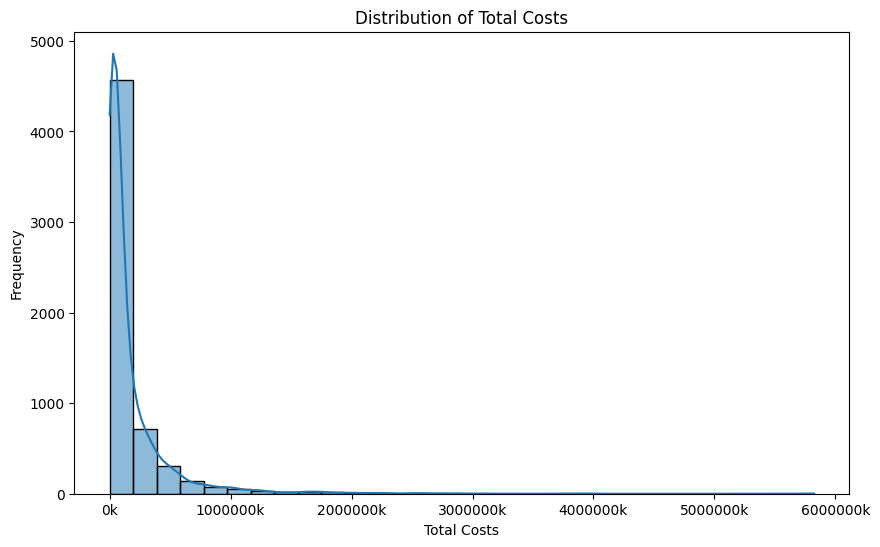

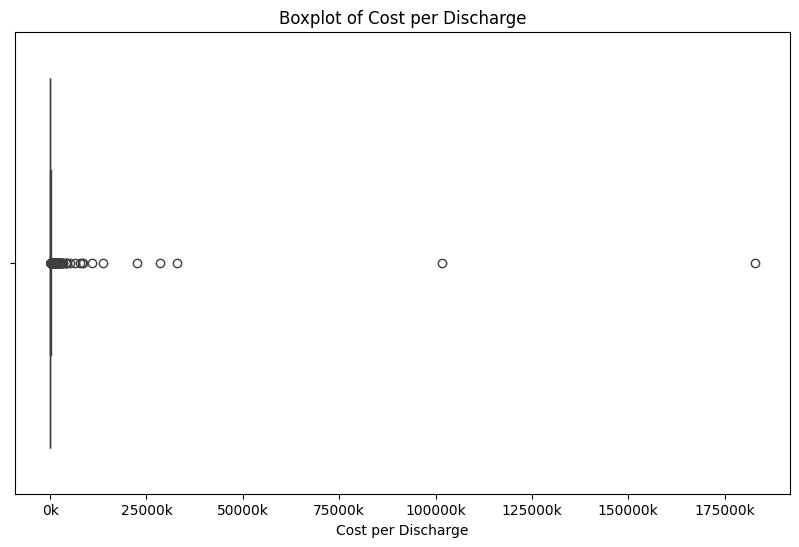

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format y-axis in 'k' (thousands)
def thousands_formatter(x, pos):
    return '%1.0fk' % (x * 1e-3)

# Histogram of Total Costs
plt.figure(figsize=(10, 6))
sns.histplot(selected_data['Total Costs'], bins=30, kde=True)
plt.title('Distribution of Total Costs')
plt.xlabel('Total Costs')
plt.ylabel('Frequency')

# Apply the custom x-axis formatting
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()

# Boxplot for Cost per Discharge
plt.figure(figsize=(10, 6))
sns.boxplot(x=selected_data['Cost per Discharge'])
plt.title('Boxplot of Cost per Discharge')
plt.xlabel('Cost per Discharge')
# Apply the custom x-axis formatting
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()


In [ ]:
import pandas as pd
import numpy as np  # Ensure numpy is imported

# Assuming you already have your DataFrame 'df'
# Log transformation of the 'Total Costs' column
df['Log Total Costs'] = df['Total Costs'].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0)


In [ ]:
# Summary statistics after handling outliers
print(df.describe())


         rpt_rec_num   Provider CCN  Type of Control  \
count    6051.000000    6051.000000      6051.000000   
mean   746992.692282  269770.559907         4.186250   
min    692984.000000   10001.000000         1.000000   
25%    736392.500000  140166.500000         2.000000   
50%    752841.000000  260048.000000         2.000000   
75%    757404.500000  393038.500000         5.000000   
max    760647.000000  713028.000000        13.000000   
std     13452.641012  160192.715537         3.208231   

              Fiscal Year Begin Date           Fiscal Year End Date  \
count                           6051                           6051   
mean   2021-03-03 03:50:35.994050816  2022-02-25 01:44:28.319286016   
min              2020-10-01 00:00:00            2020-12-31 00:00:00   
25%              2021-01-01 00:00:00            2021-12-31 00:00:00   
50%              2021-01-01 00:00:00            2021-12-31 00:00:00   
75%              2021-07-01 00:00:00            2022-06-30 00:00:00  

In [ ]:
df.shape

(6051, 119)

In [ ]:
# defining regions based on state codes
regions = {
    'Northeast': ['NY', 'NJ', 'PA', 'MA', 'CT', 'RI', 'NH', 'VT', 'ME'],
    'Midwest': ['IL', 'IN', 'OH', 'MI', 'WI', 'MO', 'MN', 'IA', 'ND', 'SD', 'NE', 'KS'],
    'South': ['TX', 'FL', 'GA', 'NC', 'SC', 'VA', 'AL', 'KY', 'LA', 'MS', 'AR', 'TN', 'WV', 'MD', 'OK'],
    'West': ['CA', 'OR', 'WA', 'NV', 'AZ', 'NM', 'CO', 'ID', 'UT', 'MT', 'WY']
}

# Create a new column 'region' by mapping the state codes to regions
selected_data['region'] = selected_data['State Code'].map(
    lambda x: next((k for k, v in regions.items() if x in v), np.nan)
)


<ipython-input-19-efa30a87268a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['region'] = selected_data['State Code'].map(


In [ ]:
region = selected_data['region'].unique()
print(region)

['South' 'Midwest' 'West' 'Northeast' nan]


In [ ]:
# Filter out rows where 'region' is 'Other'
selected_data = selected_data[selected_data['region'] != 'nan']


In [ ]:
print(selected_data.head())

  Rural Versus Urban  Total Discharges                         Hospital Name  \
0                  R              38.0         LAUDERDALE COMMUNITY HOSPITAL   
1                  U              37.0   LIFEBRITE COMMUNITY HOPITAL OF STOK   
2                  U              79.0              JACKSON GENERAL HOSPITAL   
3                  R             441.0  LAKEVIEW MEDICAL CENTER OF RICE LAKE   
4                  R            2260.0             MARSHFIELD MEDICAL CENTER   

  State Code CCN Facility Type  Provider CCN  Total Costs  \
0         TN               CAH        441314    3464690.0   
1         NC               CAH        341317    3317508.0   
2         WV               CAH        511320    8244299.0   
3         WI               STH        520011   31876483.0   
4         WI               STH        520037  144931472.0   

   Cost of Charity Care  Total Discharges Title XVIII      County  \
0                4045.0                          35.0  LAUDERDALE   
1             

In [ ]:
df.to_excel('cleaned_data.xlsx', index=False)
from google.colab import files

In [ ]:
files.download('cleaned_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

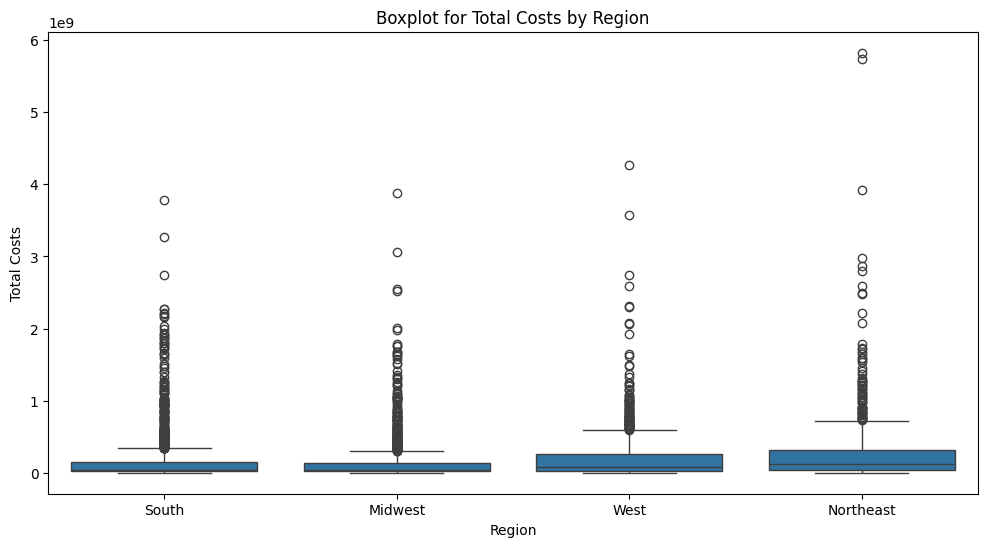

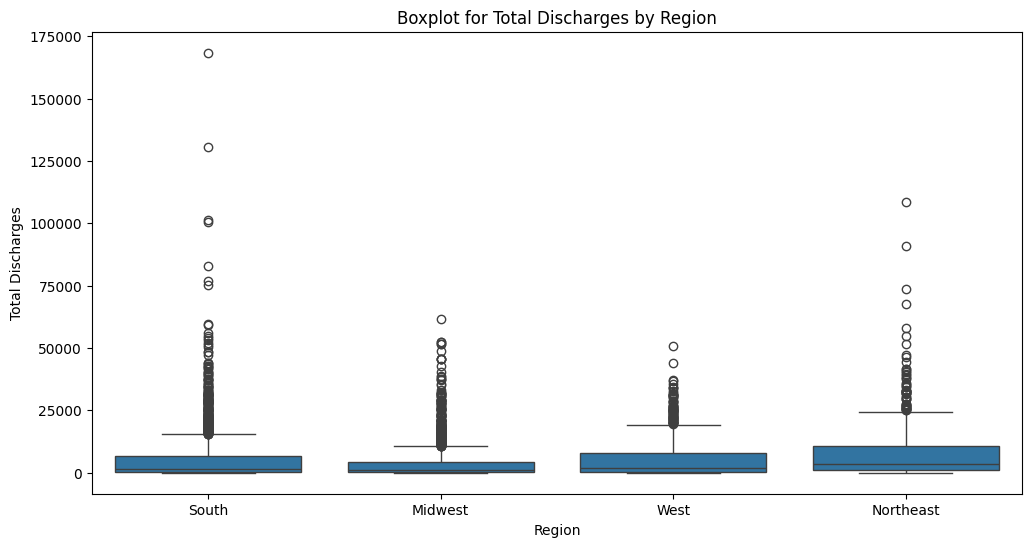

In [ ]:
# Boxplot for total costs across regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='Total Costs', data=selected_data)
plt.title('Boxplot for Total Costs by Region')
plt.xlabel('Region')
plt.ylabel('Total Costs')
plt.show()

# Boxplot for total discharges across facility types
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='Total Discharges', data=selected_data)
plt.title('Boxplot for Total Discharges by Region')
plt.xlabel('Region')
plt.ylabel('Total Discharges')
plt.show()


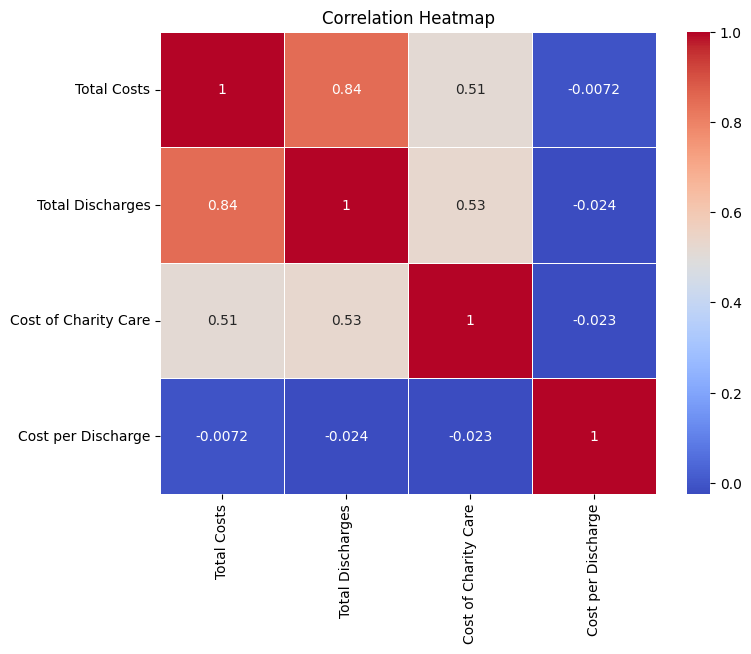

In [ ]:
# Correlation matrix
correlation_matrix = selected_data[['Total Costs', 'Total Discharges', 'Cost of Charity Care', 'Cost per Discharge']].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


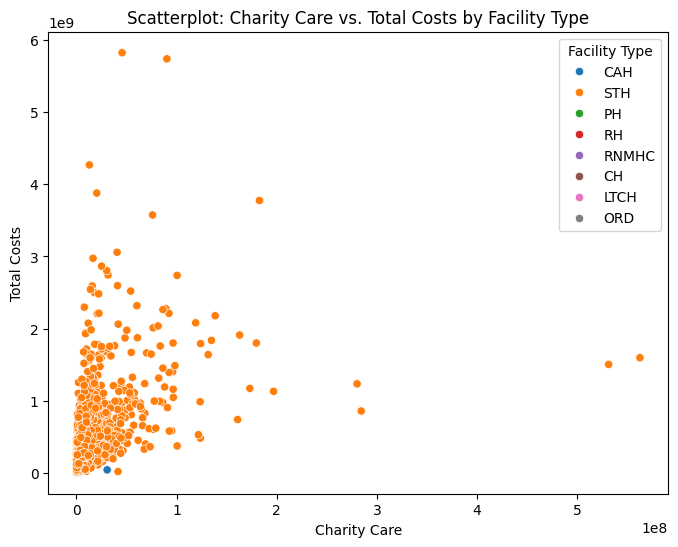

In [ ]:
# Scatterplot: Charity Care vs. Total Costs
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cost of Charity Care', y='Total Costs', hue='CCN Facility Type', data=selected_data)
plt.title('Scatterplot: Charity Care vs. Total Costs by Facility Type')
plt.xlabel('Charity Care')
plt.ylabel('Total Costs')
plt.legend(title='Facility Type')
plt.show()


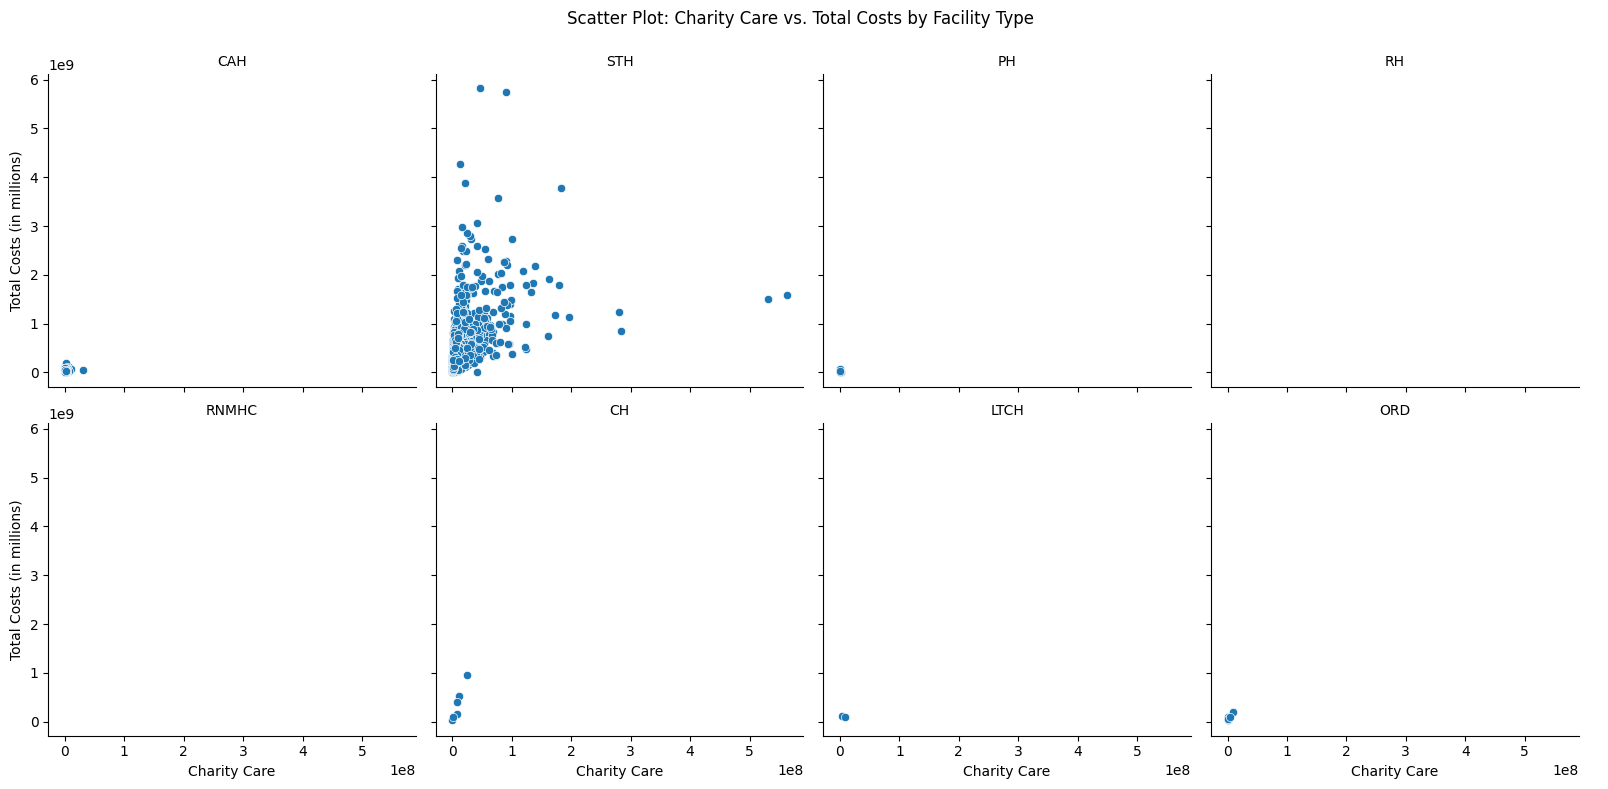

In [ ]:
g = sns.FacetGrid(selected_data, col='CCN Facility Type', col_wrap=4, height=4)
g.map(sns.scatterplot, 'Cost of Charity Care', 'Total Costs')
g.add_legend()
g.set_axis_labels('Charity Care', 'Total Costs (in millions)')
g.set_titles(col_template='{col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot: Charity Care vs. Total Costs by Facility Type')
plt.show()


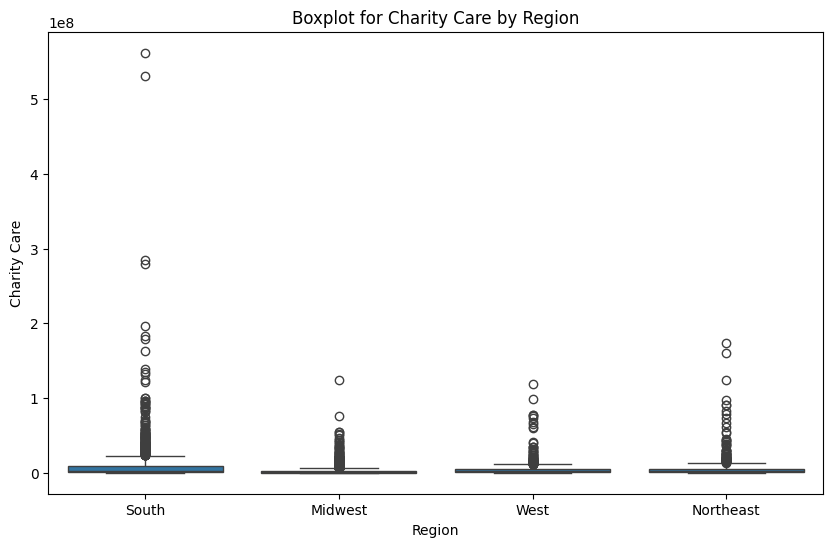

In [ ]:
# Boxplot for charity care across regions
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='Cost of Charity Care', data=selected_data)
plt.title('Boxplot for Charity Care by Region')
plt.xlabel('Region')
plt.ylabel('Charity Care')
plt.show()


<ipython-input-29-c351a29964b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='Cost of Charity Care', data=selected_data, palette="muted")


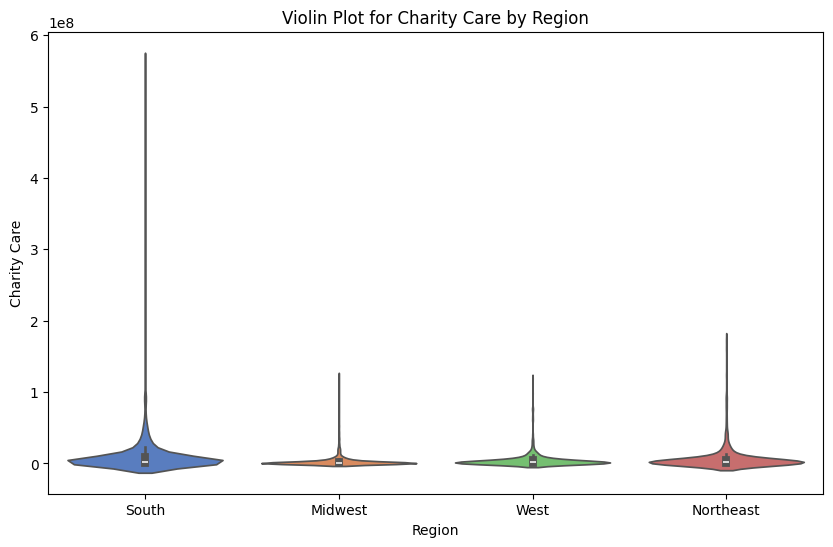

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='region', y='Cost of Charity Care', data=selected_data, palette="muted")
plt.title('Violin Plot for Charity Care by Region')
plt.xlabel('Region')
plt.ylabel('Charity Care')
plt.show()


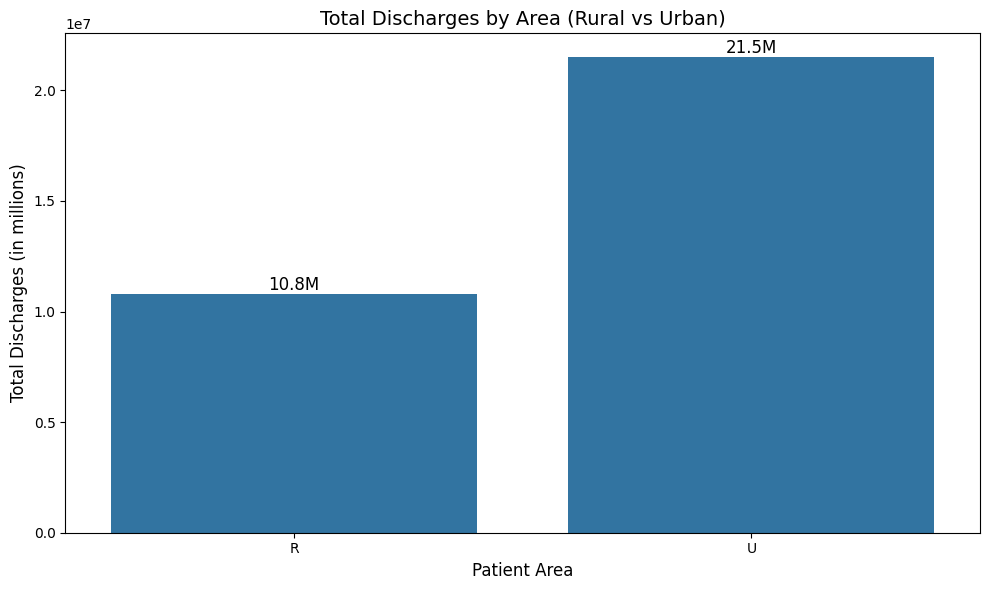

In [ ]:
# Filter out rows where 'Rural Versus Urban' is 'Unknown'
filtered_data = selected_data[selected_data['Rural Versus Urban'] != 'Unknown']

# Aggregate total discharges by patient area (Rural vs Urban)
discharges_by_area = filtered_data.groupby('Rural Versus Urban')['Total Discharges'].sum().reset_index()

# Create bar plots for discharge rates by demographics
plt.figure(figsize=(10, 6))

# Bar plot for Rural vs Urban
ax = sns.barplot(x='Rural Versus Urban', y='Total Discharges', data=discharges_by_area)

# Add value labels on top of the bars in millions
for p in ax.patches:
    height_in_millions = p.get_height() / 1_000_000  # Convert to millions
    ax.annotate(f'{height_in_millions:.1f}M',  # Format to one decimal place with 'M'
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12)

# Set title and labels
plt.title('Total Discharges by Area (Rural vs Urban)', fontsize=14)
plt.xlabel('Patient Area', fontsize=12)
plt.ylabel('Total Discharges (in millions)', fontsize=12)

# Remove legend if it appears
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

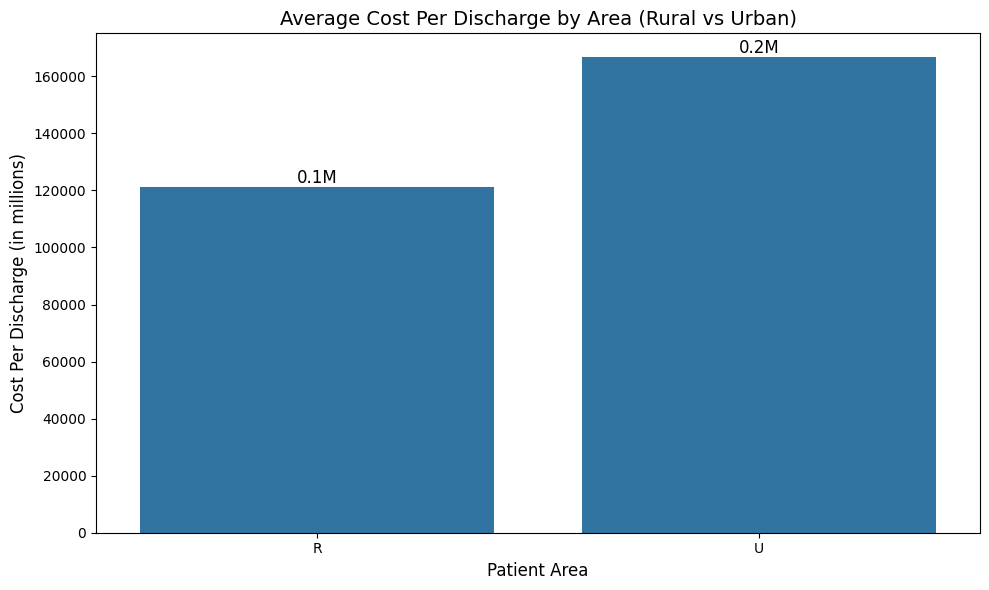

In [ ]:
# Filter out rows where 'Rural Versus Urban' is 'Unknown'
filtered_data = selected_data[selected_data['Rural Versus Urban'] != 'Unknown']

# Aggregate average cost per discharge by patient area (Rural vs Urban)
cost_by_area = filtered_data.groupby('Rural Versus Urban')['Cost per Discharge'].mean().reset_index()

# Create bar plots for cost per discharge by demographics
plt.figure(figsize=(10, 6))

# Bar plot for Rural vs Urban
ax = sns.barplot(x='Rural Versus Urban', y='Cost per Discharge', data=cost_by_area)

# Add value labels on top of the bars in millions
for p in ax.patches:
    height_in_millions = p.get_height() / 1_000_000  # Convert to millions
    ax.annotate(f'{height_in_millions:.1f}M',  # Format to one decimal place with 'M'
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12)

# Set title and labels
plt.title('Average Cost Per Discharge by Area (Rural vs Urban)', fontsize=14)
plt.xlabel('Patient Area', fontsize=12)
plt.ylabel('Cost Per Discharge (in millions)', fontsize=12)

# Remove legend if it appears
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

<ipython-input-32-a4d69cc24d47>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sns.heatmap(heatmap_data, annot=heatmap_data.applymap(lambda x: f'{int(x / 1_000_000)}M'), fmt='', cmap='YlGnBu')


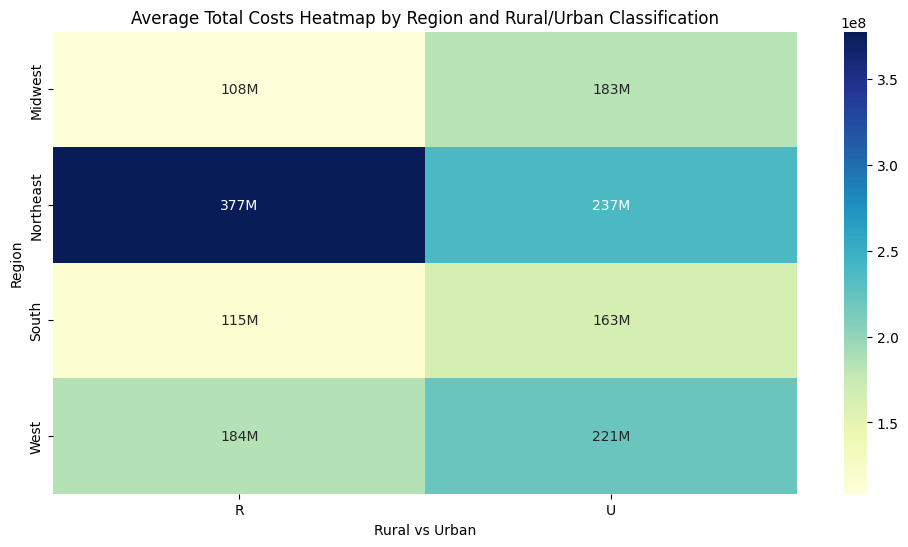

In [ ]:
# Filter out rows where 'Rural Versus Urban' is 'Unknown'
filtered_data = selected_data[selected_data['Rural Versus Urban'] != 'Unknown']
# Create a pivot table for the heatmap
heatmap_data = filtered_data.pivot_table(values='Total Costs', index='region', columns='Rural Versus Urban', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=heatmap_data.applymap(lambda x: f'{int(x / 1_000_000)}M'), fmt='', cmap='YlGnBu')
plt.title('Average Total Costs Heatmap by Region and Rural/Urban Classification')
plt.xlabel('Rural vs Urban')
plt.ylabel('Region')
plt.show()


In [ ]:
costs_by_facility = df.groupby('CCN Facility Type')['Total Costs'].sum().reset_index()
print(costs_by_facility)

  CCN Facility Type   Total Costs
0               CAH  3.997078e+10
1                CH  3.505370e+10
2              LTCH  1.000432e+10
3               ORD  6.481307e+08
4                PH  1.843368e+10
5                RH  8.489144e+09
6             RNMHC  2.675432e+07
7               STH  9.136852e+11


In [ ]:
df['Fiscal Year'] = df['Fiscal Year Begin Date'].dt.year  # Extract year
costs_by_year = df.groupby('Fiscal Year')['Total Costs'].sum().reset_index()
print(costs_by_year)

   Fiscal Year   Total Costs
0         2020  1.675192e+11
1         2021  8.587925e+11


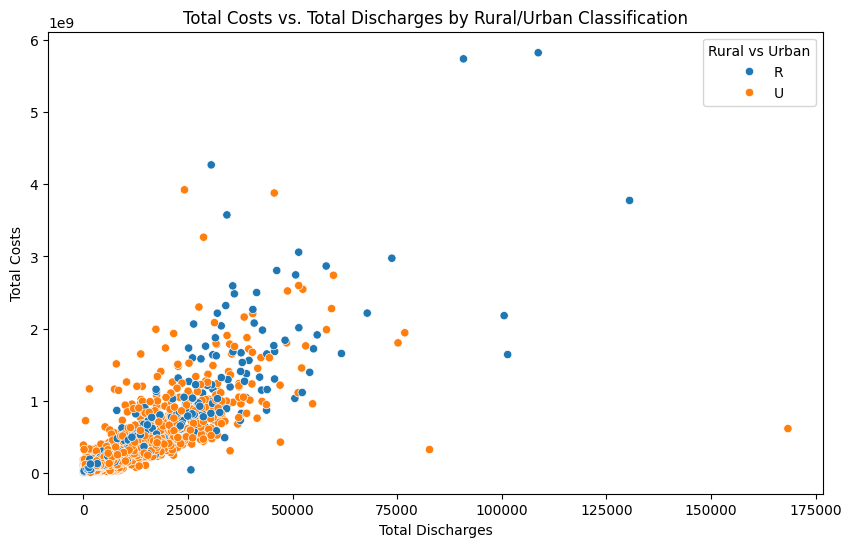

In [ ]:
# Scatter plot of Total Costs vs. Total Discharges
# Filter out rows where 'Rural Versus Urban' is 'Unknown'
filtered_df = df[df['Rural Versus Urban'] != 'Unknown']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Discharges', y='Total Costs', data=filtered_df, hue='Rural Versus Urban')
plt.title('Total Costs vs. Total Discharges by Rural/Urban Classification')
plt.xlabel('Total Discharges')
plt.ylabel('Total Costs')
plt.legend(title='Rural vs Urban')
plt.show()


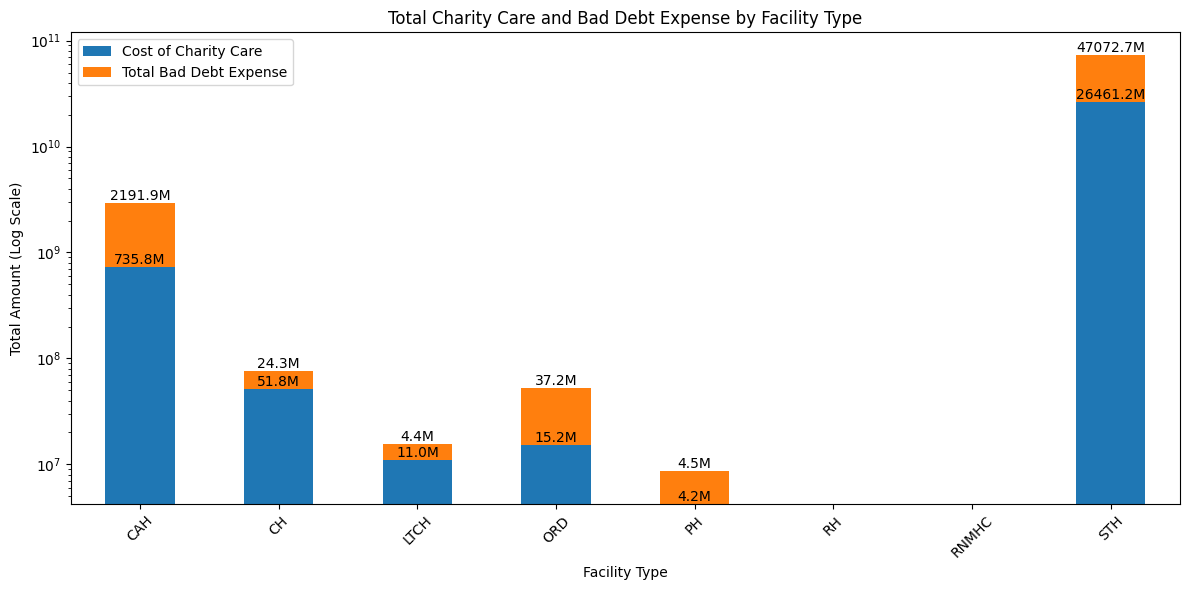

In [ ]:
import matplotlib.pyplot as plt

# Preparing data for stacked bar chart
stacked_data = df.groupby('CCN Facility Type')[['Cost of Charity Care', 'Total Bad Debt Expense']].sum().reset_index()

# Create the stacked bar chart
ax = stacked_data.set_index('CCN Facility Type').plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding title and labels
plt.title('Total Charity Care and Bad Debt Expense by Facility Type')
plt.ylabel('Total Amount (Log Scale)')
plt.xlabel('Facility Type')
plt.xticks(rotation=45)

# Set y-axis to a logarithmic scale
ax.set_yscale('log')

# Adding value labels above each bar segment
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if height is positive
        # Convert height to millions and format with 'M'
        height_in_millions = height / 1_000_000
        ax.annotate(f'{height_in_millions:.1f}M',  # Format to one decimal place with 'M'
                    (p.get_x() + p.get_width() / 2., p.get_y() + height + 5000),  # Position slightly above the bar
                    ha='center', va='bottom',
                    fontsize=10)
    else:
        # If height is zero, annotate with '0'
        ax.annotate('0',
                    (p.get_x() + p.get_width() / 2., p.get_y() + 5000),  # Position slightly above the bar
                    ha='center', va='bottom',
                    fontsize=10)

plt.tight_layout()
plt.show()


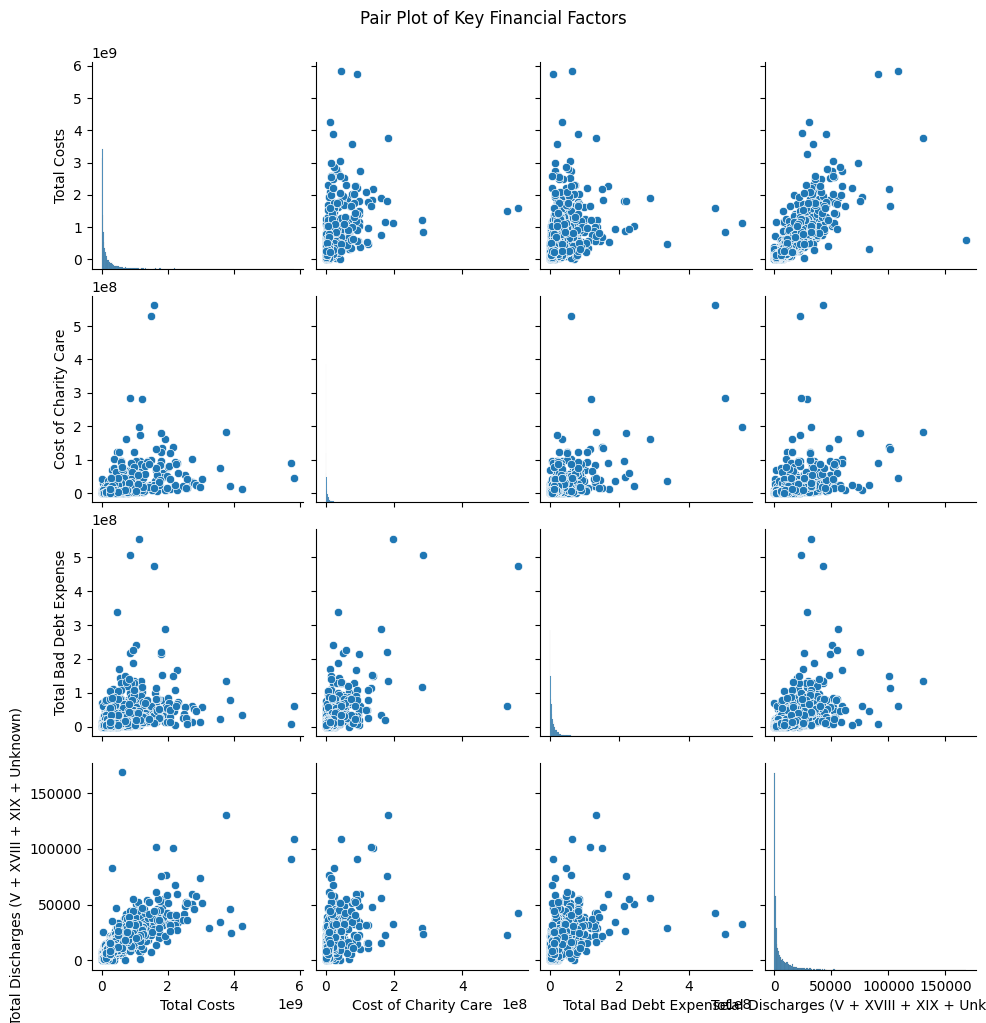

In [ ]:
# Pair plot to see relationships between key financial factors and total costs
sns.pairplot(df[['Total Costs', 'Cost of Charity Care', 'Total Bad Debt Expense', 'Total Discharges (V + XVIII + XIX + Unknown)']])
plt.suptitle('Pair Plot of Key Financial Factors', y=1.02)
plt.show()


In [ ]:
region = selected_data['region'].unique()
print(region)

['South' 'Midwest' 'West' 'Northeast' nan]


<ipython-input-39-88545f306084>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_avg_cost, x='region', y='Cost_per_Discharge', palette="YlGnBu")


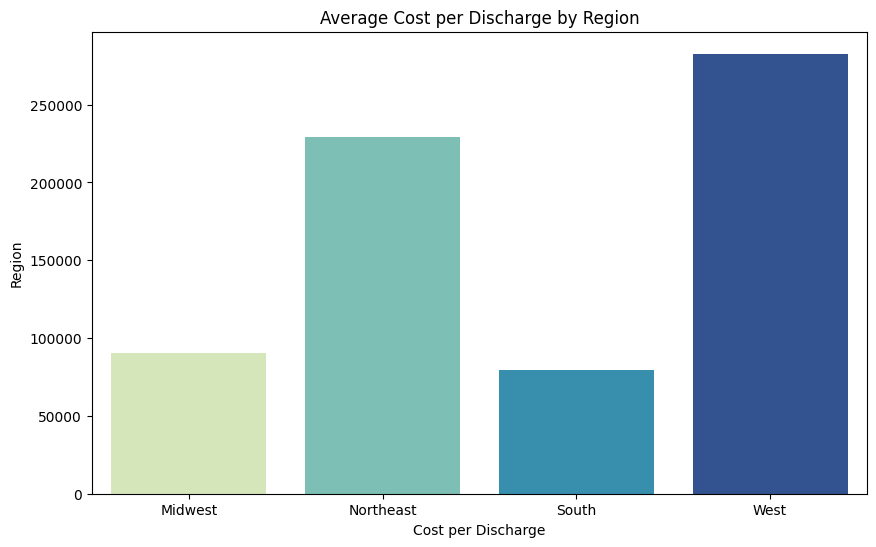

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'selected_data' is the DataFrame with the required data
# Calculate average cost per discharge by region
selected_data['Cost_per_Discharge'] = selected_data['Total Costs'] / selected_data['Total Discharges']

# Group by region and calculate the average cost per discharge
region_avg_cost = selected_data.groupby('region')['Cost_per_Discharge'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a heatmap; 'region' will be shown on the y-axis, and the values will be displayed in a single column.
# Since we only have one column to visualize, we can use a barplot instead.
sns.barplot(data=region_avg_cost, x='region', y='Cost_per_Discharge', palette="YlGnBu")

# Add titles and labels
plt.title("Average Cost per Discharge by Region")
plt.xlabel("Cost per Discharge")
plt.ylabel("Region")

# Display the plot
plt.show()


<ipython-input-40-918864cee17f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_total_cost, x='region', y='Total Discharges', palette=custom_colors)


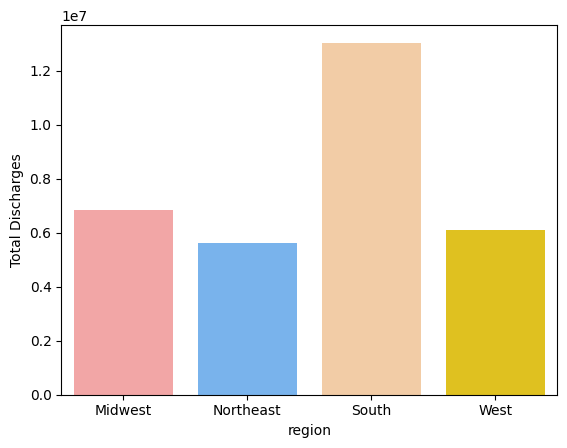

In [ ]:
# Custom color list
custom_colors = ['#FF9999', '#66B3FF', '#FFCC99', '#FFD700']  # Replace with your desired colors

# Group by region and calculate the sum of total costs
region_total_cost = selected_data.groupby('region')['Total Discharges'].sum().reset_index()

# Create a bar plot with custom colors
sns.barplot(data=region_total_cost, x='region', y='Total Discharges', palette=custom_colors)


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'selected_data' is the DataFrame with the required data



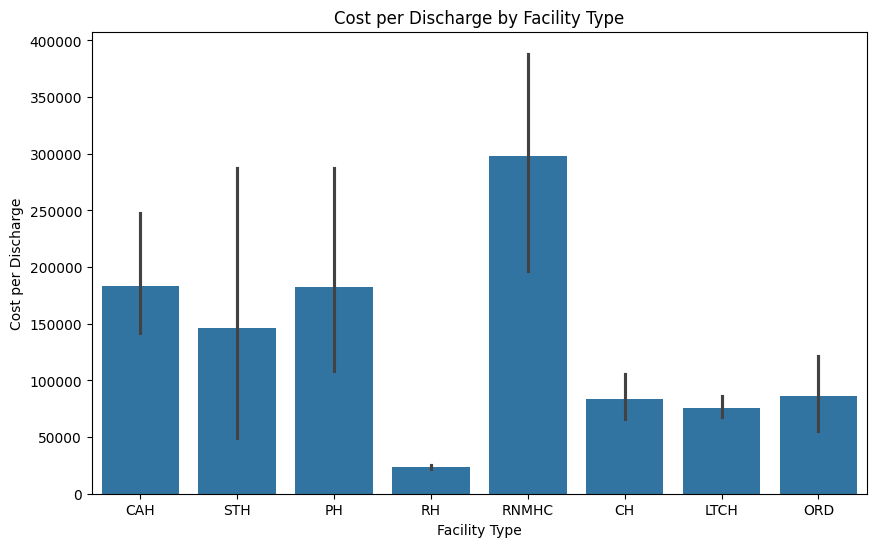

In [ ]:
# Box plot of cost per discharge by facility type
plt.figure(figsize=(10, 6))
sns.barplot(x='CCN Facility Type', y='Cost per Discharge', data= selected_data)
plt.title("Cost per Discharge by Facility Type")
plt.xlabel("Facility Type")
plt.ylabel("Cost per Discharge")
plt.show()


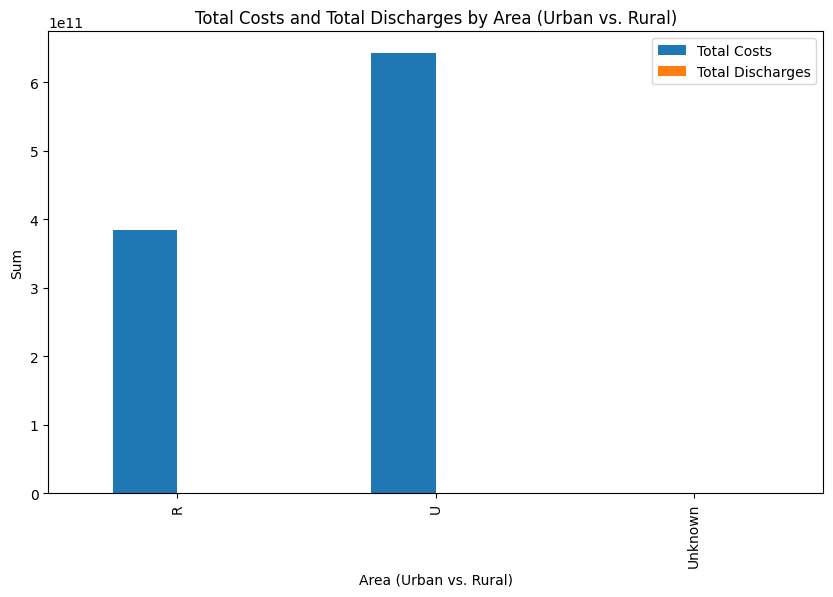

In [ ]:
# Summarize total costs and discharges by Area (Urban/Rural)
area_summary = df.groupby('Rural Versus Urban').agg({
    'Total Costs': 'sum',
    'Total Discharges': 'sum'
}).reset_index()

# Bar chart
area_summary.plot(kind="bar", x="Rural Versus Urban", figsize=(10, 6))
plt.title("Total Costs and Total Discharges by Area (Urban vs. Rural)")
plt.xlabel("Area (Urban vs. Rural)")
plt.ylabel("Sum")
plt.legend(["Total Costs", "Total Discharges"])
plt.show()


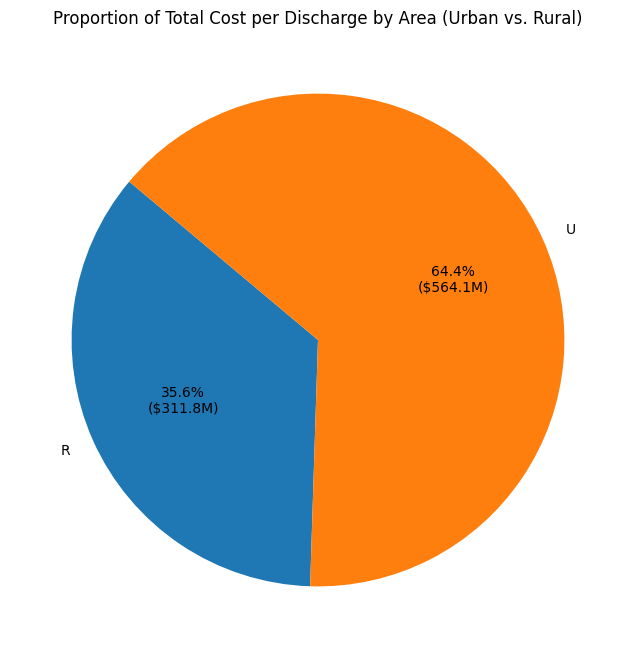

In [ ]:
# Filter out 'Unknown' from the Area column
df_filtered = selected_data[selected_data["Rural Versus Urban"] != "Unknown"]

# Calculate total Cost per Discharge by Area
area_cost_summary = df_filtered.groupby("Rural Versus Urban")["Cost per Discharge"].sum()

# Convert values to millions for display
area_cost_summary_millions = area_cost_summary / 1e6

# Define a custom label function
def pie_label(pct, values):
    absolute = int(pct / 100. * sum(values))
    return f"{pct:.1f}%\n(${absolute / 1e6:.1f}M)"

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    area_cost_summary_millions,
    labels=area_cost_summary.index,
    autopct=lambda pct: pie_label(pct, area_cost_summary),
    startangle=140
)
plt.title("Proportion of Total Cost per Discharge by Area (Urban vs. Rural)")
plt.show()


In [ ]:
# Calculate Charity Care as a percentage of Total Costs
selected_data['Charity Care % of Total Costs'] = (selected_data['Cost of Charity Care'] / selected_data['Total Costs']) * 100


In [ ]:

df_filtered = selected_data[selected_data["Rural Versus Urban"] != "Unknown"]

# Group by Region and Area (Urban/Rural) for heatmap data
charity_care_pct = df_filtered.groupby(['region', 'Rural Versus Urban'])['Charity_Care_Percentage'].mean().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(charity_care_pct, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Charity Care as % of Total Costs by Region and Area (Urban/Rural)")
plt.xlabel("Area (Urban/Rural)")
plt.ylabel("Region")
plt.show()


KeyError: 'Column not found: Charity_Care_Percentage'

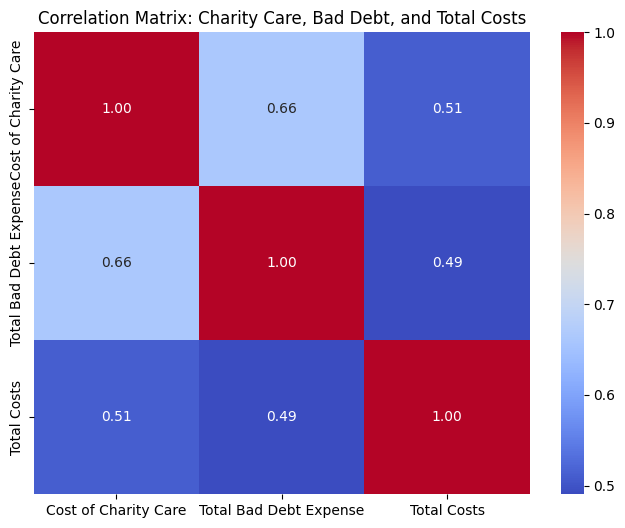

In [ ]:
# Calculate correlation
correlation_matrix = df[['Cost of Charity Care', 'Total Bad Debt Expense', 'Total Costs']].corr()

# Plot heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Charity Care, Bad Debt, and Total Costs")
plt.show()


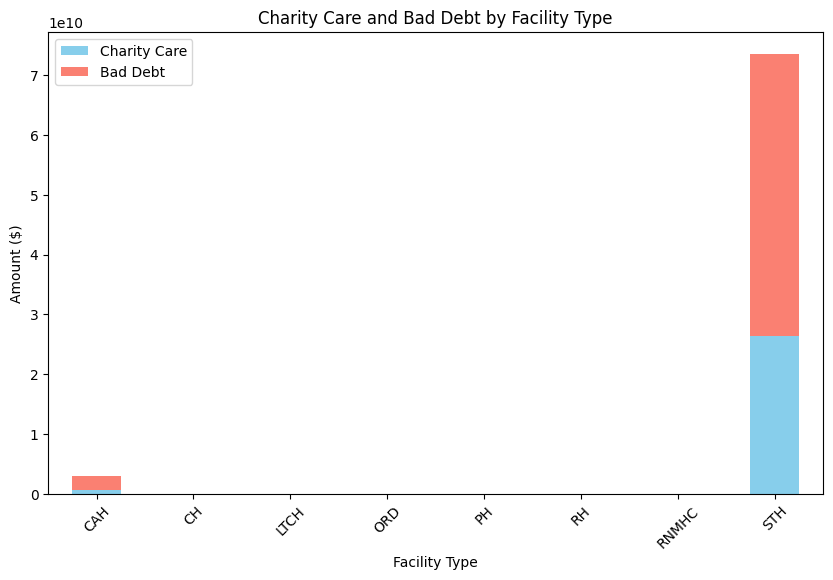

In [ ]:
# Sum Charity Care and Bad Debt by Facility Type
facility_financials = df.groupby('CCN Facility Type')[['Cost of Charity Care', 'Total Bad Debt Expense']].sum().reset_index()
facility_financials.set_index('CCN Facility Type', inplace=True)

# Plot stacked bar chart
facility_financials.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title("Charity Care and Bad Debt by Facility Type")
plt.xlabel("Facility Type")
plt.ylabel("Amount ($)")
plt.legend(["Charity Care", "Bad Debt"])
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculating public discharges ratio
df['Public_Discharge_Ratio'] = (df['Total Discharges Title V'] +
                                df['Total Discharges Title XVIII'] +
                                df['Total Discharges Title XIX']) / df['Total Discharges (V + XVIII + XIX + Unknown)']

print(df['Public_Discharge_Ratio'])


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6046   NaN
6047   NaN
6048   NaN
6049   NaN
6050   NaN
Name: Public_Discharge_Ratio, Length: 6051, dtype: float64


In [ ]:
selected_data = selected_data.dropna(subset=['Total Costs', 'Cost per Discharge'])
selected_data = selected_data.groupby('CCN Facility Type').filter(
    lambda x: x['Total Costs'].var() > 0 and x['Cost per Discharge'].var() > 0
)


In [ ]:
total_costs_facility = [group['Total Costs'].values for name, group in selected_data.groupby('CCN Facility Type')]
cost_per_discharge_facility = [group['Cost per Discharge'].values for name, group in selected_data.groupby('CCN Facility Type')]

anova_costs = f_oneway(*total_costs_facility)
anova_discharge_costs = f_oneway(*cost_per_discharge_facility)

print("ANOVA for Total Costs by Facility Type:")
print("F-statistic:", anova_costs.statistic, "P-value:", anova_costs.pvalue)

print("\nANOVA for Cost per Discharge by Facility Type:")
print("F-statistic:", anova_discharge_costs.statistic, "P-value:", anova_discharge_costs.pvalue)


ANOVA for Total Costs by Facility Type:
F-statistic: 154.62164002642268 P-value: 1.5937610618667503e-210

ANOVA for Cost per Discharge by Facility Type:
F-statistic: 0.1783572817038503 P-value: 0.9897571960355156


            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1 group2     meandiff    p-adj       lower           upper      reject
---------------------------------------------------------------------------
   CAH     CH  536239010.5828    0.0  414794305.8711  657683715.2944   True
   CAH   LTCH    -465224.1694    1.0  -56615272.7985   55684824.4596  False
   CAH    ORD    51873129.365 0.9998 -279774263.6215  383520522.3516  False
   CAH     PH      1942253.61    1.0   -44038572.102    47923079.322  False
   CAH     RH   -3418533.3183    1.0  -60776577.0311   53939510.3945  False
   CAH  RNMHC    -25798923.01    1.0 -357446315.9965  305848469.9766  False
   CAH    STH  252868404.7092    0.0   222715768.011  283021041.4075   True
    CH   LTCH -536704234.7522    0.0  -665636851.457 -407771618.0475   True
    CH    ORD -484365881.2177 0.0008 -835735750.3927 -132996012.0428   True
    CH     PH -534296756.9728    0.0  -659136766.675 -409456747.2706   True
    CH     R

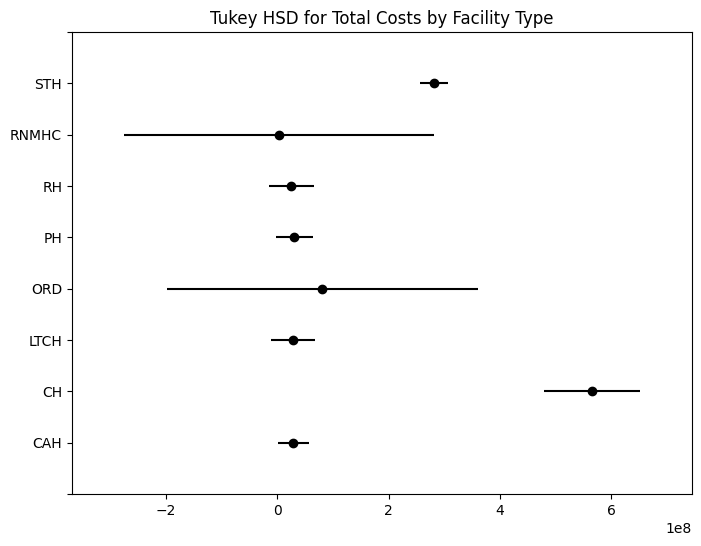

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Tukey's HSD Test for Total Costs by Facility Type
tukey_test = pairwise_tukeyhsd(
    endog=selected_data['Total Costs'],  # Dependent variable
    groups=selected_data['CCN Facility Type'],  # Grouping variable
    alpha=0.05  # Significance level
)

# Print results
print(tukey_test)

# Visualize the results (optional)
import matplotlib.pyplot as plt
tukey_test.plot_simultaneous(figsize=(8, 6))
plt.title("Tukey HSD for Total Costs by Facility Type")
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Data cleaning: Remove rows with missing values in 'Total Costs' and 'Cost per Discharge'
selected_data = selected_data.dropna(subset=['Total Costs', 'Cost per Discharge'])

# Filter groups where both 'Total Costs' and 'Cost per Discharge' have non-zero variance
selected_data = selected_data.groupby('CCN Facility Type').filter(
    lambda x: x['Total Costs'].var() > 0 and x['Cost per Discharge'].var() > 0
)

# Group the data by 'CCN Facility Type'
total_costs_facility = [group['Total Costs'].values for name, group in selected_data.groupby('CCN Facility Type')]
cost_per_discharge_facility = [group['Cost per Discharge'].values for name, group in selected_data.groupby('CCN Facility Type')]

# Perform ANOVA for both 'Total Costs' and 'Cost per Discharge'
anova_costs = f_oneway(*total_costs_facility)
anova_discharge_costs = f_oneway(*cost_per_discharge_facility)

# Display results for ANOVA on Total Costs by Facility Type
print("ANOVA for Total Costs by Facility Type:")
print("F-statistic:", anova_costs.statistic, "P-value:", anova_costs.pvalue)

# Display results for ANOVA on Cost per Discharge by Facility Type
print("\nANOVA for Cost per Discharge by Facility Type:")
print("F-statistic:", anova_discharge_costs.statistic, "P-value:", anova_discharge_costs.pvalue)


ANOVA for Total Costs by Facility Type:
F-statistic: 154.62164002642268 P-value: 1.5937610618667503e-210

ANOVA for Cost per Discharge by Facility Type:
F-statistic: 0.1783572817038503 P-value: 0.9897571960355156


In [ ]:
# Group data by region
total_costs_region = [group['Total Costs'].values for name, group in selected_data.groupby('region')]
discharges_region = [group['Total Discharges'].values for name, group in selected_data.groupby('region')]
# Check for missing values in 'Charity Care'
missing_charity_care = selected_data['Cost of Charity Care'].isna().sum()

# Check variance of 'Charity Care' by Region
charity_care_variance = selected_data.groupby('region')['Cost of Charity Care'].var()


# Remove rows with missing 'Charity Care' values and rerun ANOVA
selected_data_clean = selected_data.dropna(subset=['Cost of Charity Care'])
charity_care_region_clean = [group['Cost of Charity Care'].values for name, group in selected_data_clean.groupby('region')]
anova_region_charity_clean = f_oneway(*charity_care_region_clean)


# Perform ANOVA for each variable
anova_region_costs = f_oneway(*total_costs_region)
anova_region_discharges = f_oneway(*discharges_region)
anova_region_charity = f_oneway(*charity_care_region)

# Display results
print("ANOVA for Total Costs by Region:")
print("F-statistic:", anova_region_costs.statistic, "P-value:", anova_region_costs.pvalue)

print("\nANOVA for Total Discharges by Region:")
print("F-statistic:", anova_region_discharges.statistic, "P-value:", anova_region_discharges.pvalue)

# Display results after cleaning
print("\nANOVA for Charity Care by Region:")
print("F-statistic:", anova_region_charity_clean.statistic, "P-value:", anova_region_charity_clean.pvalue)



ANOVA for Total Costs by Region:
F-statistic: 40.793024543916296 P-value: 4.427789227080577e-26

ANOVA for Total Discharges by Region:
F-statistic: 26.920369636251746 P-value: 2.7633393103334592e-17

ANOVA for Charity Care by Region:
F-statistic: 38.292331539838635 P-value: 2.0771319151068974e-24
